Inpainting

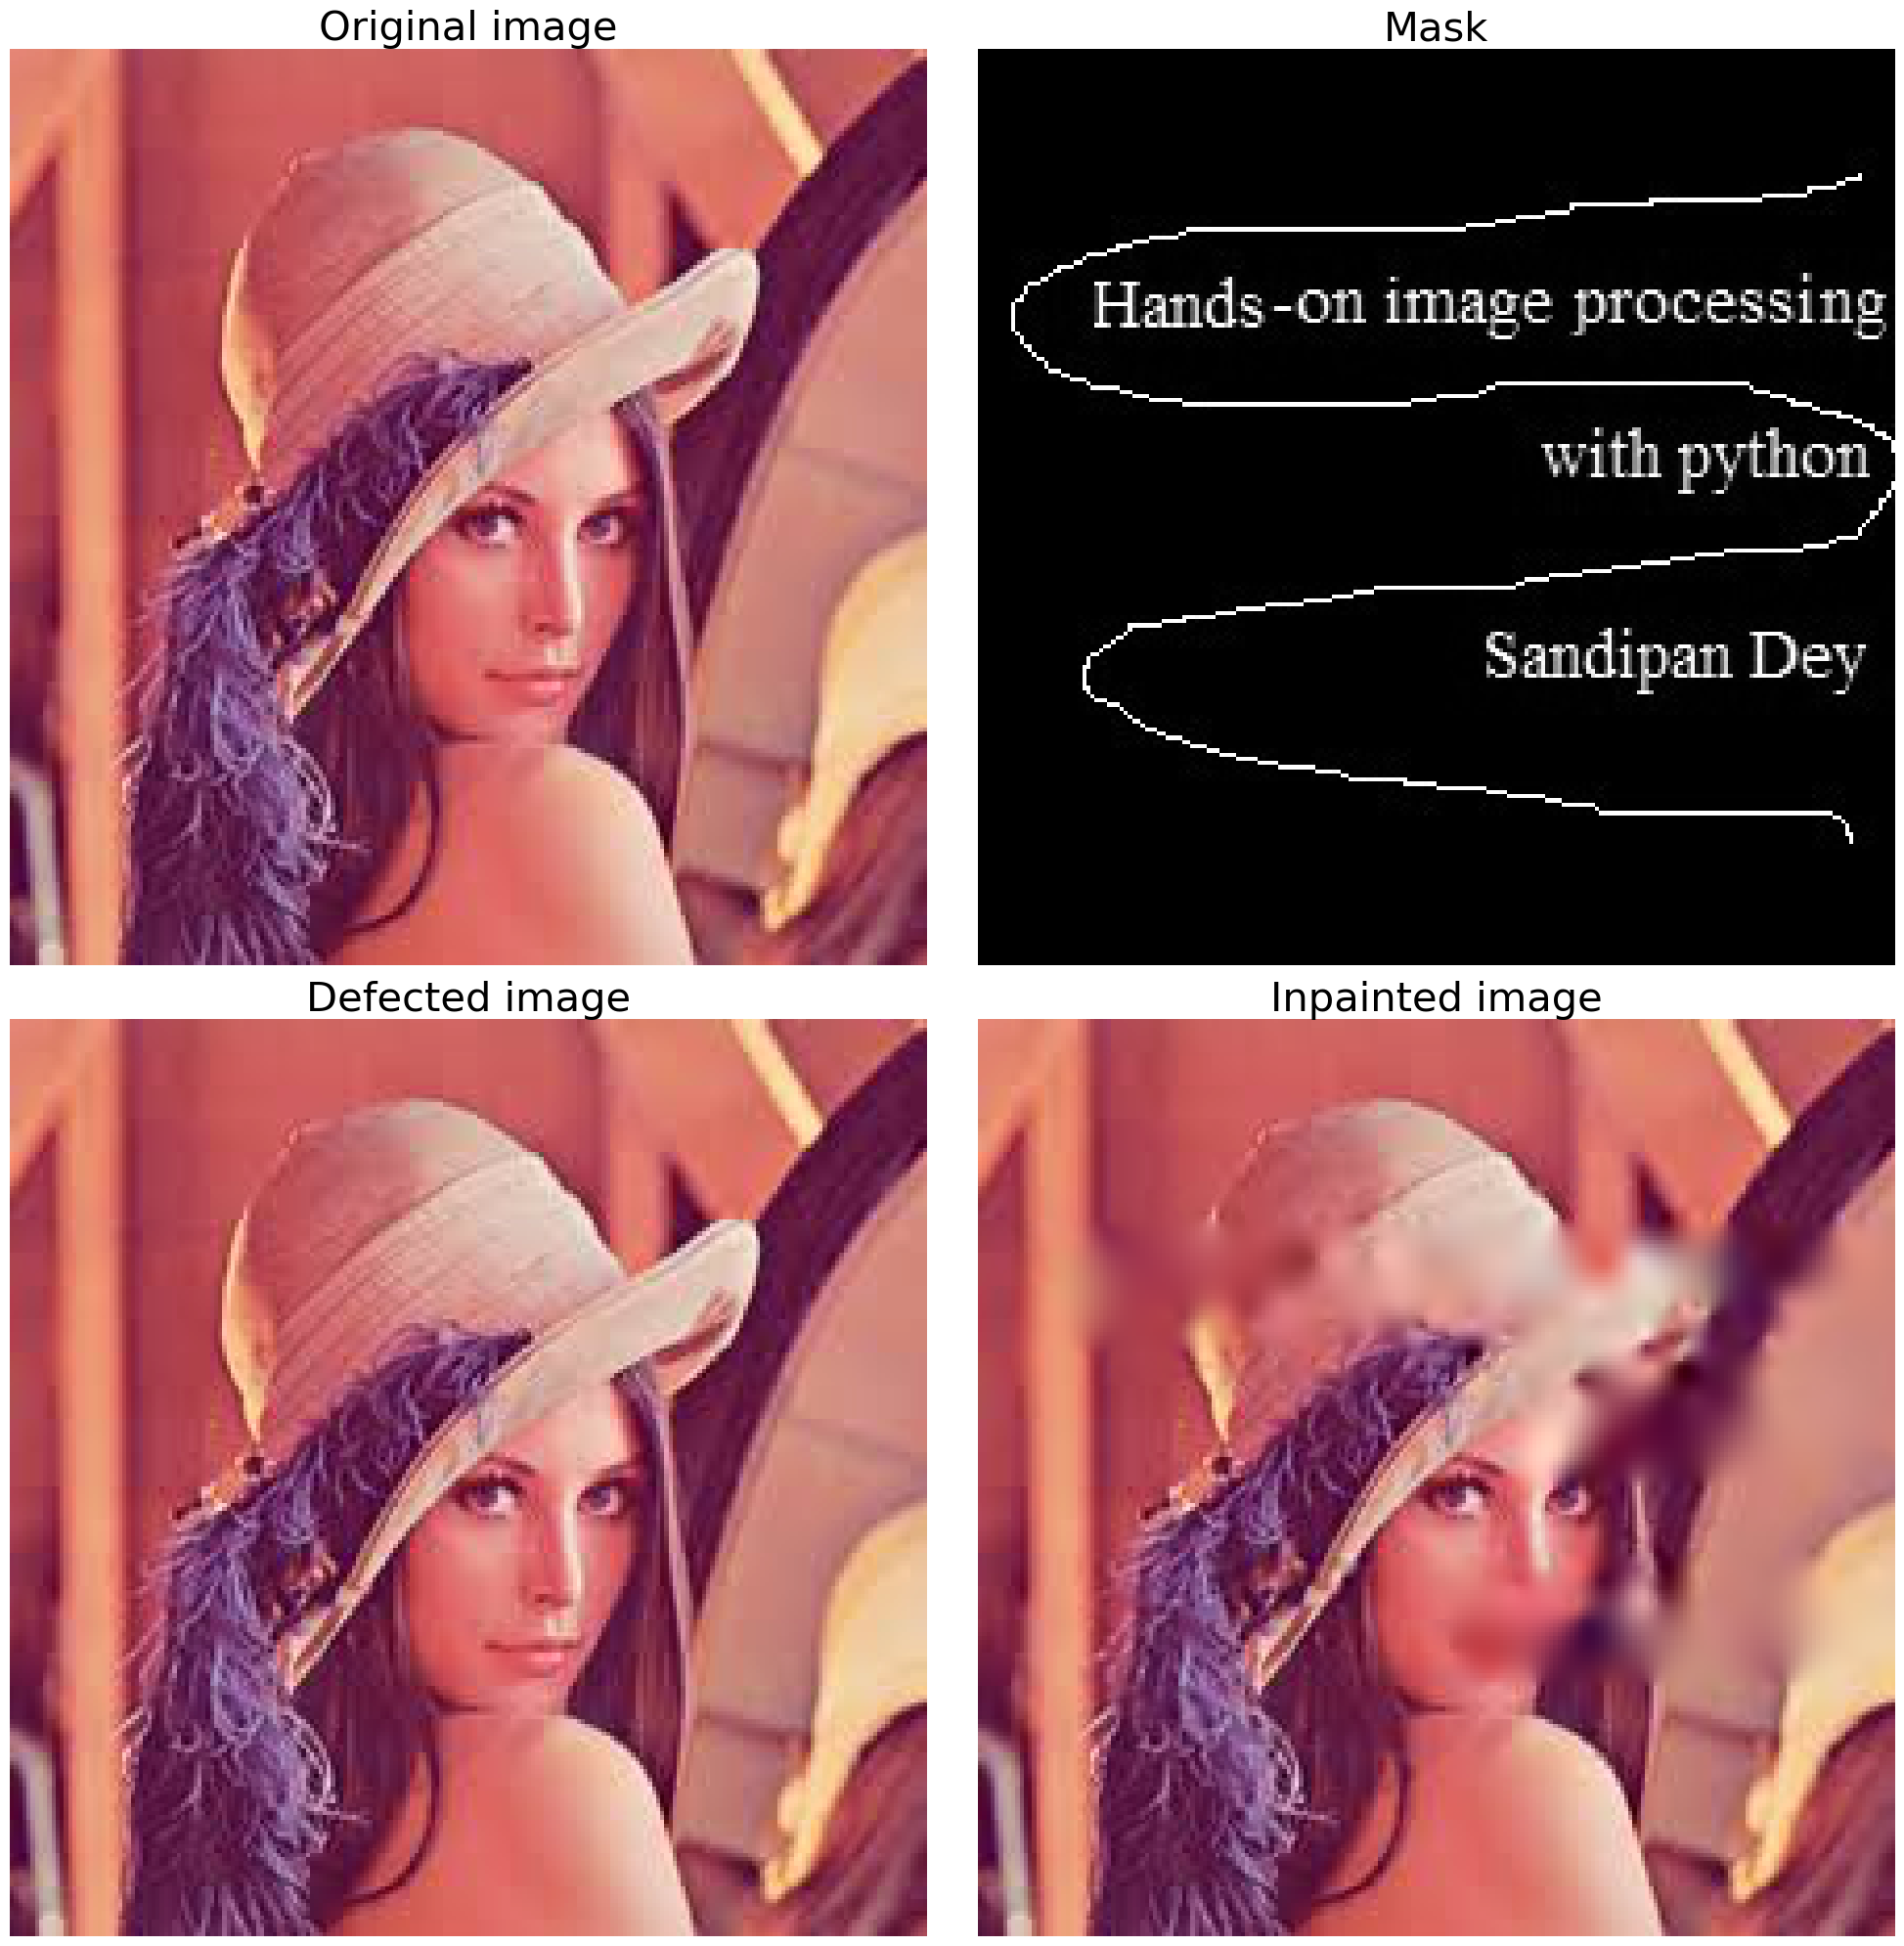

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.io import imread
from skimage import img_as_float
from skimage.restoration import inpaint
image_orig = img_as_float(imread('../images/lena.jpg'))
mask = rgb2gray(imread('../images/lena_scratch_mask.jpg'))
image_defect = image_orig.copy()
image_result = np.zeros_like(image_orig)
for layer in range(image_defect.shape[-1]):
    image_defect_channel = image_defect[..., layer]
    inpainted_channel = inpaint.inpaint_biharmonic(image_defect_channel, mask)
    image_result[..., layer] = inpainted_channel
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
ax = axes.ravel()
ax[0].set_title('Original image', size=30)
ax[0].imshow(image_orig)
ax[1].set_title('Mask', size=30)
ax[1].imshow(mask, cmap=plt.cm.gray)
ax[2].set_title('Defected image', size=30)
ax[2].imshow(image_defect)
ax[3].set_title('Inpainted image', size=30)
ax[3].imshow(image_result)
for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

Variational Denoising

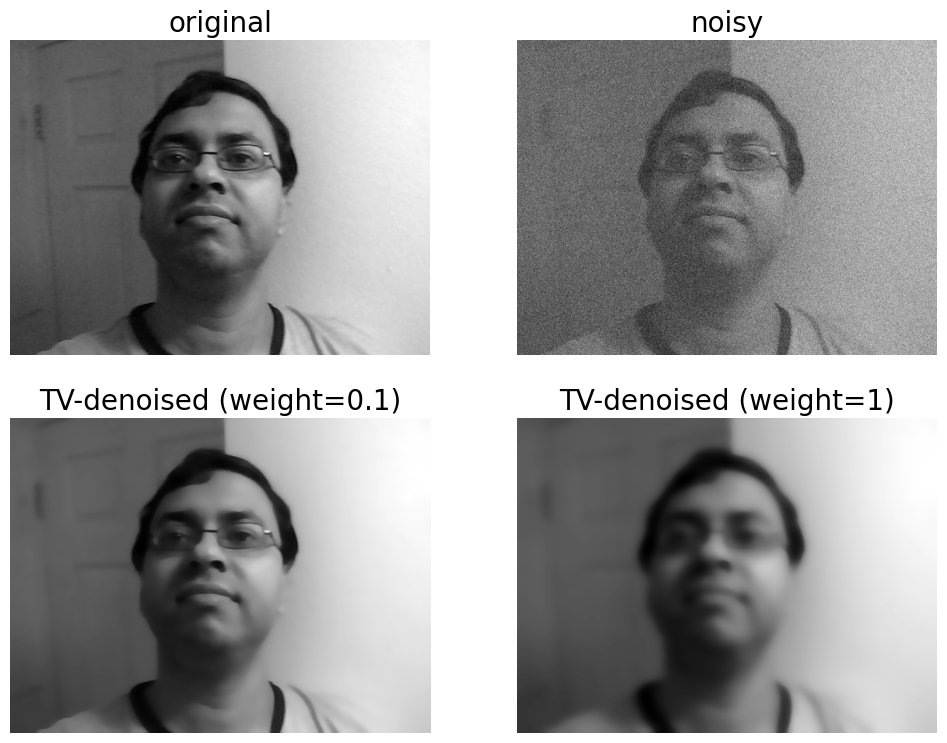

In [2]:
from skimage import io, color, data, img_as_float
from skimage.restoration import denoise_tv_chambolle
import matplotlib.pylab as plt
import numpy as np
img = color.rgb2gray(io.imread('../images/me12.jpg'))
plt.figure(figsize=(12,9))
plt.gray()
noisy_img = img + 0.5 * img.std() * np.random.randn(*img.shape)
plt.subplot(221), plt.imshow(img), plt.axis('off'), plt.title('original', size=20)
plt.subplot(222), plt.imshow(noisy_img), plt.axis('off'), plt.title('noisy', size=20)
denoised_img = denoise_tv_chambolle(img, weight=0.1) #, multichannel=True)
plt.subplot(223), plt.imshow(denoised_img), plt.axis('off'), plt.title('TV-denoised (weight=0.1)',
size=20)
denoised_img = denoise_tv_chambolle(img, weight=1) #, multichannel=True)
plt.subplot(224), plt.imshow(denoised_img), plt.axis('off'), plt.title('TV-denoised (weight=1)',
size=20)
plt.show()